<a href="https://colab.research.google.com/github/rocx320/TextAnalytics/blob/main/2247226_textanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer, SnowballStemmer, RegexpStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Load Text Data

text_data = """

भारत के प्रधानमंत्री नरेंद्र मोदी (Narendra Modi) पूरी दुनिया में कितने पॉपुलर हैं, इसे लेकर समय-समय पर कई सारे रिपोर्ट्स आते रहते हैं. लेकिन क्या हो अगर अमेरिका के राष्ट्रपति जो बाइडेन खुद पीएम मोदी का ऑटोग्राफ मांगने आ जाएं. जी हां, कुछ ऐसा ही हुआ Quad की बैठक में. जापान में चल रहे हैं क्वाड बैठक में बाइडेन ने पीएम मोदी से कहा कि आप कैसे इतने भारी भीड़ को मैनेज करते हैं? इसके लिए उन्हें (बाइडेन को) पीएम मोदी का ऑटोग्राफ लेना चाहिए. उन्होंने पीएम मोदी से कहा कि उनके प्रोग्राम में शामिल होने के लिए लगातार लोग बाइडेन से सिफारिश कर रहे हैं, जो उन्हें परेशान कर रहा है. वहीं ऑस्ट्रेलियाई प्रधानमंत्री एंथनी अल्बनीस (Anthony Albanese) ने कहा कि सिडनी में कम्यूनिटी रिसेप्शन में 20000 लोगों की क्षमता है, लेकिन अभी भी वह लोगों के रिक्वेस्ट को पूरा नहीं कर पा रहे हैं.

बाइडेन ने मांगा पीएम मोदी का ऑटोग्राफ

राष्ट्रपति बाइडेन और पीएम अल्बनीस दोनों ने अपनी अजीबोगरीब चुनौतियों के बारे में पीएम मोदी से शिकायत की. पीएम अल्बनीस ने कहा कि उन्हें याद कि कैसे नरेंद्र मोदी स्टेडियम में 90 हजार से अधिक लोगों ने उनकी जीत पर उनका स्वागत किया था. इस पर बाइडेन ने पीएम मोदी से कहा, "मुझे आपका ऑटोग्राफ लेना चाहिए."

जापान में चल रहा है क्वाड सम्मेलन

पीएम मोदी अपने जापानी समकक्ष फुमियो किशिदा (Fumio Kishida) के इन्विटेशन पर पूर्वी एशियाई देश का दौरा कर रहे हैं. पीएम मोदी G7 शिखर सम्मेलन में भाग लेने के लिए जापान में गए हुए हैं. वह 19 मई से 21 मई तक G7 शिखर सम्मेलन के लिए हिरोशिमा में हैं. PM modi ने शनिवार को कहा कि भारत 2024 में अगली Quad (चतुर्भुज सुरक्षा संवाद बैठक) की मेजबानी करने का इच्छुक होगा.

पीएम मोदी अमेरिका, ऑस्ट्रेलिया और जापान के नेताओं को संबोधित कर रहे थे, जो जापान के साथ Quad अनौपचारिक रणनीतिक मंच का गठन करते हैं, जिसका प्राथमिक उद्देश्य मुक्त, खुले, समृद्ध और समावेशी इंडो-पैसेफिक क्षेत्र के लिए काम करना है. प्रधानमंत्री Narendra Modi ने कहा, "Quad वैश्विक भलाई, लोगों के कल्याण, समृद्धि और शांति के लिए प्रयास करना जारी रखेगा."
"""


In [ ]:
# Word Count
word_count = len(text_data.split())
print("Word Count:", word_count)

Word Count: 349


In [ ]:
# Tokenization
tokens = word_tokenize(text_data)
print("Tokens:", tokens)

Tokens: ['भारत', 'के', 'प्रधानमंत्री', 'नरेंद्र', 'मोदी', '(', 'Narendra', 'Modi', ')', 'पूरी', 'दुनिया', 'में', 'कितने', 'पॉपुलर', 'हैं', ',', 'इसे', 'लेकर', 'समय-समय', 'पर', 'कई', 'सारे', 'रिपोर्ट्स', 'आते', 'रहते', 'हैं', '.', 'लेकिन', 'क्या', 'हो', 'अगर', 'अमेरिका', 'के', 'राष्ट्रपति', 'जो', 'बाइडेन', 'खुद', 'पीएम', 'मोदी', 'का', 'ऑटोग्राफ', 'मांगने', 'आ', 'जाएं', '.', 'जी', 'हां', ',', 'कुछ', 'ऐसा', 'ही', 'हुआ', 'Quad', 'की', 'बैठक', 'में', '.', 'जापान', 'में', 'चल', 'रहे', 'हैं', 'क्वाड', 'बैठक', 'में', 'बाइडेन', 'ने', 'पीएम', 'मोदी', 'से', 'कहा', 'कि', 'आप', 'कैसे', 'इतने', 'भारी', 'भीड़', 'को', 'मैनेज', 'करते', 'हैं', '?', 'इसके', 'लिए', 'उन्हें', '(', 'बाइडेन', 'को', ')', 'पीएम', 'मोदी', 'का', 'ऑटोग्राफ', 'लेना', 'चाहिए', '.', 'उन्होंने', 'पीएम', 'मोदी', 'से', 'कहा', 'कि', 'उनके', 'प्रोग्राम', 'में', 'शामिल', 'होने', 'के', 'लिए', 'लगातार', 'लोग', 'बाइडेन', 'से', 'सिफारिश', 'कर', 'रहे', 'हैं', ',', 'जो', 'उन्हें', 'परेशान', 'कर', 'रहा', 'है', '.', 'वहीं', 'ऑस्ट्रेलियाई', 'प्रधा

In [ ]:
# Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(token) for token in tokens]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['भारत', 'के', 'प्रधानमंत्री', 'नरेंद्र', 'मोदी', '(', 'narendra', 'modi', ')', 'पूरी', 'दुनिया', 'में', 'कितने', 'पॉपुलर', 'हैं', ',', 'इसे', 'लेकर', 'समय-समय', 'पर', 'कई', 'सारे', 'रिपोर्ट्स', 'आते', 'रहते', 'हैं', '.', 'लेकिन', 'क्या', 'हो', 'अगर', 'अमेरिका', 'के', 'राष्ट्रपति', 'जो', 'बाइडेन', 'खुद', 'पीएम', 'मोदी', 'का', 'ऑटोग्राफ', 'मांगने', 'आ', 'जाएं', '.', 'जी', 'हां', ',', 'कुछ', 'ऐसा', 'ही', 'हुआ', 'quad', 'की', 'बैठक', 'में', '.', 'जापान', 'में', 'चल', 'रहे', 'हैं', 'क्वाड', 'बैठक', 'में', 'बाइडेन', 'ने', 'पीएम', 'मोदी', 'से', 'कहा', 'कि', 'आप', 'कैसे', 'इतने', 'भारी', 'भीड़', 'को', 'मैनेज', 'करते', 'हैं', '?', 'इसके', 'लिए', 'उन्हें', '(', 'बाइडेन', 'को', ')', 'पीएम', 'मोदी', 'का', 'ऑटोग्राफ', 'लेना', 'चाहिए', '.', 'उन्होंने', 'पीएम', 'मोदी', 'से', 'कहा', 'कि', 'उनके', 'प्रोग्राम', 'में', 'शामिल', 'होने', 'के', 'लिए', 'लगातार', 'लोग', 'बाइडेन', 'से', 'सिफारिश', 'कर', 'रहे', 'हैं', ',', 'जो', 'उन्हें', 'परेशान', 'कर', 'रहा', 'है', '.', 'वहीं', 'ऑस्ट्रेलियाई',

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['भारत', 'के', 'प्रधानमंत्री', 'नरेंद्र', 'मोदी', '(', 'Narendra', 'Modi', ')', 'पूरी', 'दुनिया', 'में', 'कितने', 'पॉपुलर', 'हैं', ',', 'इसे', 'लेकर', 'समय-समय', 'पर', 'कई', 'सारे', 'रिपोर्ट्स', 'आते', 'रहते', 'हैं', '.', 'लेकिन', 'क्या', 'हो', 'अगर', 'अमेरिका', 'के', 'राष्ट्रपति', 'जो', 'बाइडेन', 'खुद', 'पीएम', 'मोदी', 'का', 'ऑटोग्राफ', 'मांगने', 'आ', 'जाएं', '.', 'जी', 'हां', ',', 'कुछ', 'ऐसा', 'ही', 'हुआ', 'Quad', 'की', 'बैठक', 'में', '.', 'जापान', 'में', 'चल', 'रहे', 'हैं', 'क्वाड', 'बैठक', 'में', 'बाइडेन', 'ने', 'पीएम', 'मोदी', 'से', 'कहा', 'कि', 'आप', 'कैसे', 'इतने', 'भारी', 'भीड़', 'को', 'मैनेज', 'करते', 'हैं', '?', 'इसके', 'लिए', 'उन्हें', '(', 'बाइडेन', 'को', ')', 'पीएम', 'मोदी', 'का', 'ऑटोग्राफ', 'लेना', 'चाहिए', '.', 'उन्होंने', 'पीएम', 'मोदी', 'से', 'कहा', 'कि', 'उनके', 'प्रोग्राम', 'में', 'शामिल', 'होने', 'के', 'लिए', 'लगातार', 'लोग', 'बाइडेन', 'से', 'सिफारिश', 'कर', 'रहे', 'हैं', ',', 'जो', 'उन्हें', 'परेशान', 'कर', 'रहा', 'है', '.', 'वहीं', 'ऑस्ट्रेलिया

In [ ]:
# Stop Words
stop_words = set(stopwords.words('english'))
filtered_words = [token for token in tokens if token.lower() not in stop_words]
print("Stop Words:", stop_words)

Stop Words: {"mightn't", 'll', 'herself', "you've", 'been', 'any', 'you', 'are', 'during', 'down', 'very', 'such', 'not', "should've", 'being', 'is', 'then', 'again', 'o', 'him', 'will', 'out', 'now', 'himself', "isn't", 'between', "you'll", 'themselves', 'doesn', "that'll", "you'd", 'where', 'y', 'she', 'their', 'had', 'once', "doesn't", 'a', 'itself', 'me', 'more', 'were', 'wouldn', 'do', 'am', 'myself', 'if', 'why', 'above', 'them', 'didn', 'while', 'as', 'hadn', 'into', "you're", 'mustn', 'and', "hasn't", 'with', 'an', "don't", 'that', 'few', 'should', 'ain', "didn't", 'nor', "it's", 'we', 'all', 'whom', "shan't", 'couldn', 'further', 'only', 'aren', "haven't", 'yourself', 'what', 'here', 'weren', 's', 'its', 'be', 'there', 'in', 'can', 'but', 'it', 'no', 'same', 'below', "wasn't", 'your', 'needn', 'other', 'about', 'each', "hadn't", 'through', 'on', 'the', "she's", 'so', "wouldn't", 'yourselves', 'how', 'those', 'has', 'just', 'won', 'd', "weren't", 'wasn', 'up', 'our', 'under', '

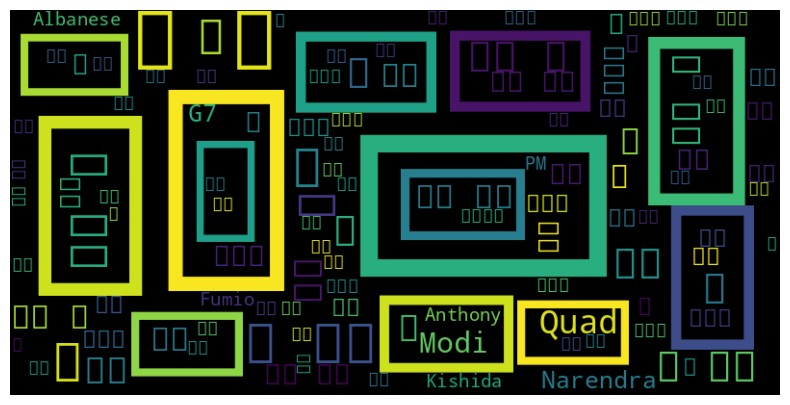

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create instances of the stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')
regexp_stemmer = RegexpStemmer(r'\b\w{4,}\b')  # Using regular expression pattern for minimum word length of 4 characters

In [ ]:
# Perform stemming with PorterStemmer
porter_stemmed_words = [porter_stemmer.stem(token) for token in tokens]
porter_stemmed_text = ' '.join(porter_stemmed_words)
porter_stem_freq = nltk.FreqDist(porter_stemmed_words)

# Perform stemming with LancasterStemmer
lancaster_stemmed_words = [lancaster_stemmer.stem(token) for token in tokens]
lancaster_stemmed_text = ' '.join(lancaster_stemmed_words)
lancaster_stem_freq = nltk.FreqDist(lancaster_stemmed_words)

# Perform stemming with SnowballStemmer
snowball_stemmed_words = [snowball_stemmer.stem(token) for token in tokens]
snowball_stemmed_text = ' '.join(snowball_stemmed_words)
snowball_stem_freq = nltk.FreqDist(snowball_stemmed_words)

# Perform stemming with RegexpStemmer
regexp_stemmed_words = [regexp_stemmer.stem(token) for token in tokens]
regexp_stemmed_text = ' '.join(regexp_stemmed_words)
regexp_stem_freq = nltk.FreqDist(regexp_stemmed_words)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

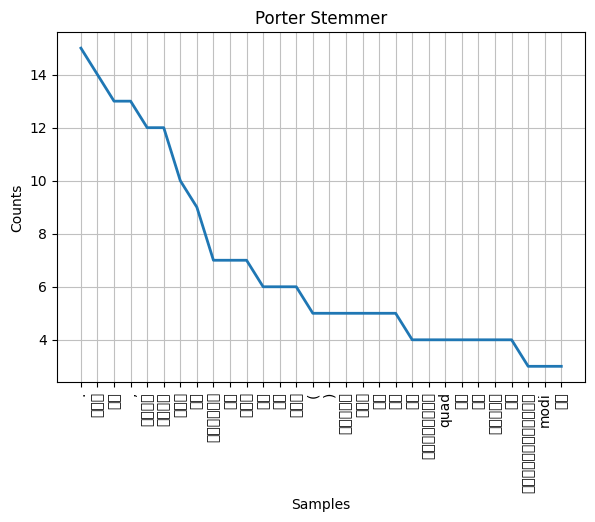

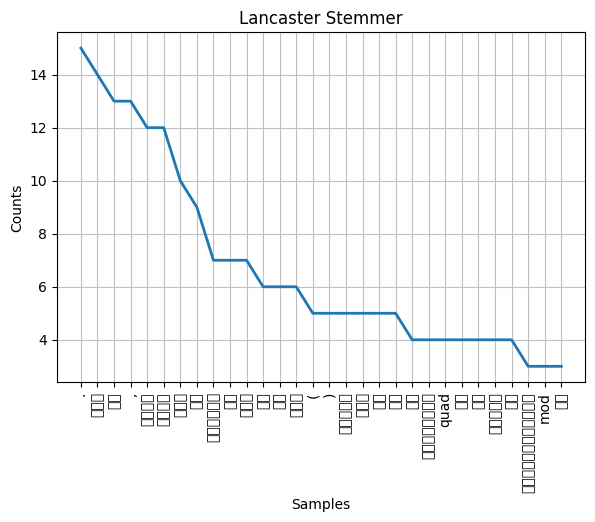

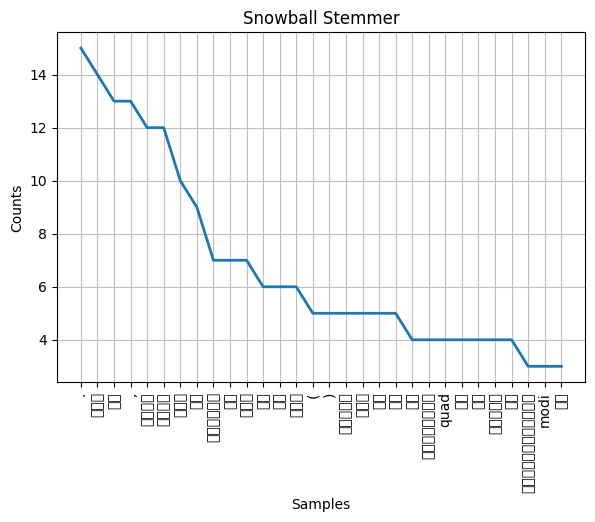

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


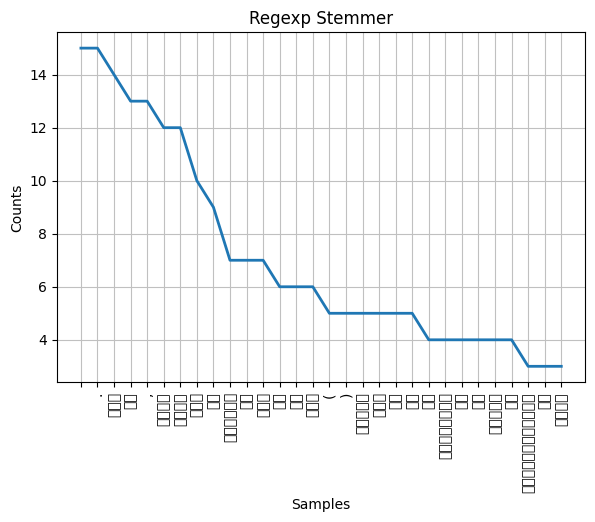

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting stem frequencies for each stemmer separately
plt.figure(figsize=(15, 10))
plt.subplot(221)
porter_stem_freq.plot(30, title='Porter Stemmer')

plt.figure(figsize=(15, 10))
plt.subplot(222)
lancaster_stem_freq.plot(30, title='Lancaster Stemmer')

plt.figure(figsize=(15, 10))
plt.subplot(223)
snowball_stem_freq.plot(30, title='Snowball Stemmer')

plt.figure(figsize=(15, 10))
plt.subplot(224)
regexp_stem_freq.plot(30, title='Regexp Stemmer')

plt.tight_layout()
plt.show()

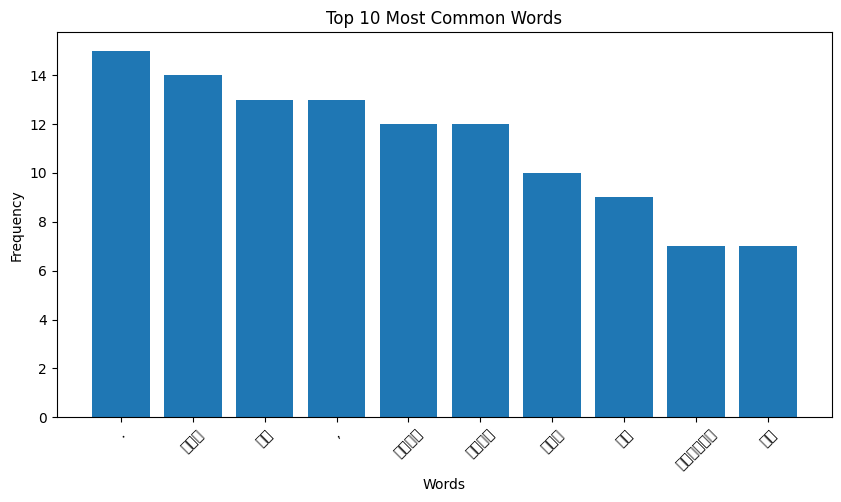

In [ ]:
word_frequency = nltk.FreqDist(tokens)
most_common_words = word_frequency.most_common(10)  # Select top 10 most common words
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()


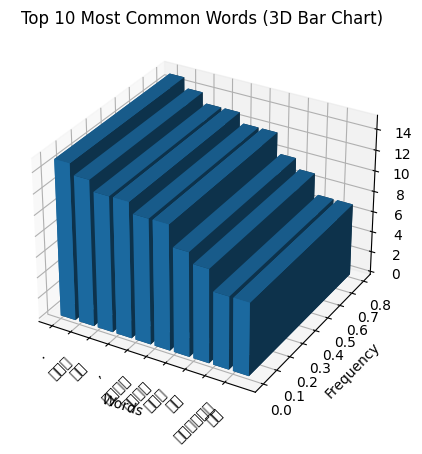

In [ ]:
# Bar Chart (Word Frequency)
word_frequency = nltk.FreqDist(tokens)
most_common_words = word_frequency.most_common(10)  # Select top 10 most common words
words, frequencies = zip(*most_common_words)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(words))
y_pos = np.arange(1)
z_pos = np.zeros(len(words))
dx = dy = 0.8
dz = frequencies

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_zlabel('Count')
ax.set_title('Top 10 Most Common Words (3D Bar Chart)')
ax.set_xticks(x_pos)
ax.set_xticklabels(words, rotation=45)
plt.show()

<ipython-input-43-040c40378eb4>:70: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.tight_layout()
<ipython-input-43-040c40378eb4>:70: UserWarning: Gl

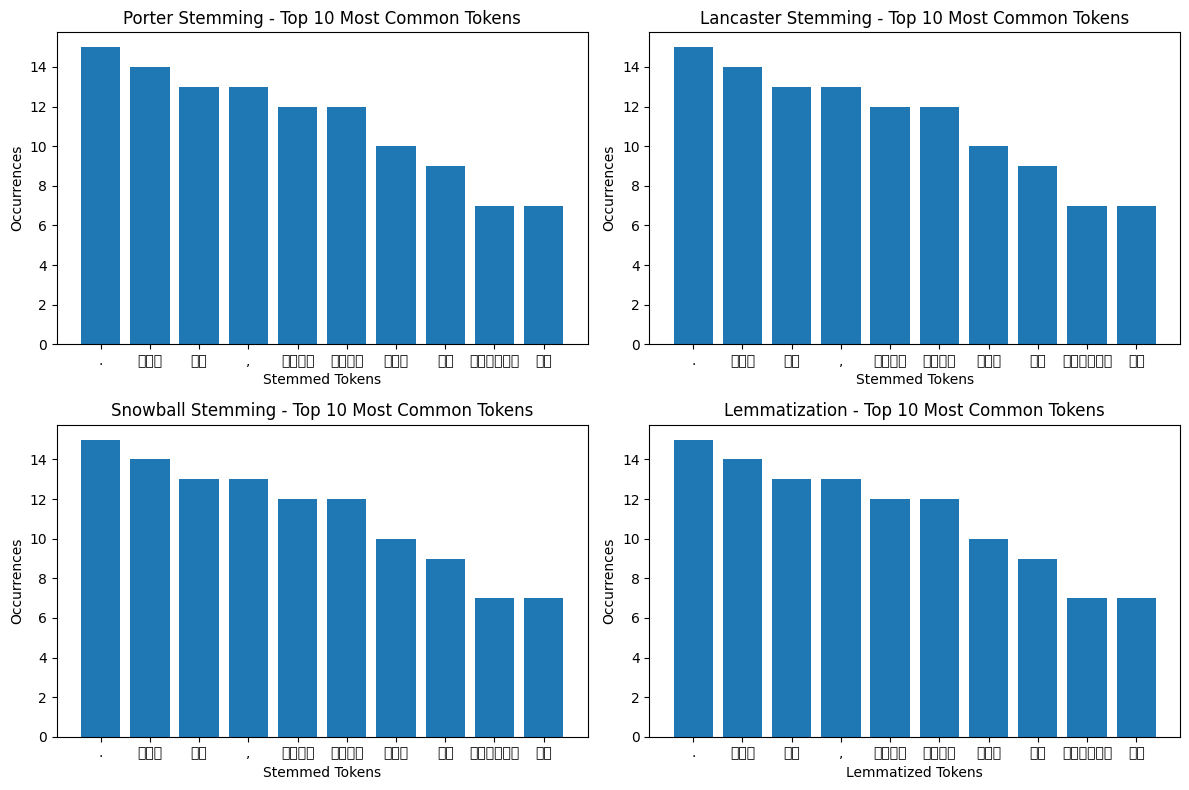

In [ ]:
# Tokenize the input text
tokens = word_tokenize(text_data.lower())

# Initialize stemmers and lemmatizer
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Perform stemming and lemmatization
porter_stemmed = [porter_stemmer.stem(token) for token in filtered_tokens]
lancaster_stemmed = [lancaster_stemmer.stem(token) for token in filtered_tokens]
snowball_stemmed = [snowball_stemmer.stem(token) for token in filtered_tokens]
lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Count the occurrences of stemmed and lemmatized tokens
porter_counts = Counter(porter_stemmed)
lancaster_counts = Counter(lancaster_stemmed)
snowball_counts = Counter(snowball_stemmed)
lemmatized_counts = Counter(lemmatized)

# Get the 10 most common stemmed and lemmatized tokens
porter_common = porter_counts.most_common(10)
lancaster_common = lancaster_counts.most_common(10)
snowball_common = snowball_counts.most_common(10)
lemmatized_common = lemmatized_counts.most_common(10)

# Extract the tokens and occurrences for plotting
porter_tokens, porter_occurrences = zip(*porter_common)
lancaster_tokens, lancaster_occurrences = zip(*lancaster_common)
snowball_tokens, snowball_occurrences = zip(*snowball_common)
lemmatized_tokens, lemmatized_occurrences = zip(*lemmatized_common)

# Generate charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Porter Stemming chart
ax1 = axes[0, 0]
ax1.bar(porter_tokens, porter_occurrences)
ax1.set_title("Porter Stemming - Top 10 Most Common Tokens")
ax1.set_xlabel("Stemmed Tokens")
ax1.set_ylabel("Occurrences")

# Lancaster Stemming chart
ax2 = axes[0, 1]
ax2.bar(lancaster_tokens, lancaster_occurrences)
ax2.set_title("Lancaster Stemming - Top 10 Most Common Tokens")
ax2.set_xlabel("Stemmed Tokens")
ax2.set_ylabel("Occurrences")

# Snowball Stemming chart
ax3 = axes[1, 0]
ax3.bar(snowball_tokens, snowball_occurrences)
ax3.set_title("Snowball Stemming - Top 10 Most Common Tokens")
ax3.set_xlabel("Stemmed Tokens")
ax3.set_ylabel("Occurrences")

# Lemmatization chart
ax4 = axes[1, 1]
ax4.bar(lemmatized_tokens, lemmatized_occurrences)
ax4.set_title("Lemmatization - Top 10 Most Common Tokens")
ax4.set_xlabel("Lemmatized Tokens")
ax4.set_ylabel("Occurrences")

# Adjust spacing between subplots
plt.tight_layout()

# Show the charts
plt.show()

In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

# words = ["running", "runner", "runs", "ran", "easily", "fairly"]

for word in stemmed_words:
    stemmed = stemmer.stem(word)
    print(f"{word} -> {stemmed}")

भारत -> भारत
के -> के
प्रधानमंत्री -> प्रधानमंत्री
नरेंद्र -> नरेंद्र
मोदी -> मोदी
( -> (
narendra -> narendra
modi -> modi
) -> )
पूरी -> पूरी
दुनिया -> दुनिया
में -> में
कितने -> कितने
पॉपुलर -> पॉपुलर
हैं -> हैं
, -> ,
इसे -> इसे
लेकर -> लेकर
समय-समय -> समय-समय
पर -> पर
कई -> कई
सारे -> सारे
रिपोर्ट्स -> रिपोर्ट्स
आते -> आते
रहते -> रहते
हैं -> हैं
. -> .
लेकिन -> लेकिन
क्या -> क्या
हो -> हो
अगर -> अगर
अमेरिका -> अमेरिका
के -> के
राष्ट्रपति -> राष्ट्रपति
जो -> जो
बाइडेन -> बाइडेन
खुद -> खुद
पीएम -> पीएम
मोदी -> मोदी
का -> का
ऑटोग्राफ -> ऑटोग्राफ
मांगने -> मांगने
आ -> आ
जाएं -> जाएं
. -> .
जी -> जी
हां -> हां
, -> ,
कुछ -> कुछ
ऐसा -> ऐसा
ही -> ही
हुआ -> हुआ
quad -> quad
की -> की
बैठक -> बैठक
में -> में
. -> .
जापान -> जापान
में -> में
चल -> चल
रहे -> रहे
हैं -> हैं
क्वाड -> क्वाड
बैठक -> बैठक
में -> में
बाइडेन -> बाइडेन
ने -> ने
पीएम -> पीएम
मोदी -> मोदी
से -> से
कहा -> कहा
कि -> कि
आप -> आप
कैसे -> कैसे
इतने -> इतने
भारी -> भारी
भीड़ -> भीड़
को -> को
मैनेज -> मैनेज
करते -> करते
हैं 